In [211]:
#market points detection



l1 = [5,4,3,2,1,2,3,4,5,6]
#return (5, 1, 1)
#find extreme points
def no_neighbors_larger(l, index):
    i, j = index, index
    left = right = 0
    while l[i-1] > l[i] and i >= 1:
        i -= 1

    while l[j] < l[j+1] and j <= len(l)-2:
        j += 1
        if j == len(l) -1:
            break
        
    return [index - i, j-index]
print(no_neighbors_smaller(l1, 4))   
print(no_neighbors_larger(l1, 4))

l2 = [1,2,3,4,5,6,5,4,3,2,1]        
def no_neighbors_smaller(l, index):
    i, j = index, index
    while l[i-1] < l[i] and i >= 1:
        i -= 1

    while l[j] > l[j+1] and j <= len(l)-2:
        j += 1
        if j ==len(l) -1:
            break
    return [index-i, j-index]

print(no_neighbors_smaller(l2, 5))
print(no_neighbors_larger(l2, 5))
#def Extreme_Points(l):
    

[0, 0]
[4, 5]
[5, 5]
[0, 0]


In [216]:
def is_extreme_large(l, index):
    return (no_neighbors_smaller(l, index)[0]>0 and no_neighbors_smaller(l, index)[1]>0)


def is_extreme_small(l, index):
    return (no_neighbors_larger(l, index)[0]>0 and no_neighbors_larger(l, index)[1]>0)

def all_large_extremes(l):
    return ([(is_extreme_large(l, i),i,l[i]) for i in range(1, len(l)-1)])
def true_large_extremes(l, days):
    return [item for item in all_large_extremes(list(df['Low'])[-days:]) if item [0] == True]
def all_small_extremes(l):
    return ([(is_extreme_small(l, i),i,l[i]) for i in range(1, len(l)-1)])
def true_small_extremes(l, days):
    return [item for item in all_small_extremes(list(df['Low'])[-days:]) if item [0] == True]
    
print(true_small_extremes(l1,5),true_large_extremes(l2,7))

[(True, 2, 2585.889893)] [(True, 1, 2710.050049)]


In [142]:
import pandas as pd
df = pd.read_csv('SPX_ONEYEAR.csv')
df['Open'].head(6)

0    2329.110107
1    2339.790039
2    2356.540039
3    2361.310059
4    2364.820068
5    2362.340088
Name: Open, dtype: float64

In [204]:
all_small_extremes(list(df['Open'])).head()
all_large_extremes(list(df['Open'])).head()

AttributeError: 'list' object has no attribute 'head'

In [132]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY
from matplotlib.dates import MonthLocator,MONTHLY
import datetime as dt
import pylab


MA1 = 10
MA2 = 50
startdate = dt.date(2017, 3, 29)
enddate = dt.date(2018, 3, 25)



def readstkData(rootpath, stockcode, sday, eday):
    
    returndata = pd.DataFrame()
    for yearnum in range(0,int((eday - sday).days / 365.25)+1):
        theyear = sday + dt.timedelta(days = yearnum * 365)
        # build file name
        filename = rootpath  + theyear.strftime('%Y') + '\\' + str(stockcode).zfill(6) + '.csv'
        
        try:
            rawdata = pd.read_csv('SPX_ONEYEAR.csv', parse_dates = True, index_col = 0, encoding = 'gbk')
        except IOError:
           raise Exception('IoError when reading dayline data file: ' + 'SPX_ONEYEAR.csv')

        returndata = pd.concat([rawdata, returndata])
    
    # Wash data
    returndata = returndata.sort_index()
    returndata.index.name = 'Date'
    returndata.columns = ['Open', 'High', 'Low', 'Close','Adjust Close' ,'Volume']

    returndata = returndata[returndata.index < eday.strftime('%Y-%m-%d')]

    return returndata



In [159]:
list(map(lambda x: x+1, [1,2,3]))

[2, 3, 4]

In [160]:
import pandas as pd
df = pd.read_csv('SPX_ONEYEAR.csv')
print(df.head(5))
format_str = '%m/%d/%Y' # The format
df['Date'] = list(map(lambda x: datetime.datetime.strptime(x, format_str).strftime("%Y%m%d"), df['Date'])
print(df.head(5))

        Date         Open         High          Low        Close    Adj Close  \
0  3/27/2017  2329.110107  2344.899902  2322.250000  2341.590088  2341.590088   
1  3/28/2017  2339.790039  2363.780029  2337.629883  2358.570068  2358.570068   
2  3/29/2017  2356.540039  2363.360107  2352.939941  2361.129883  2361.129883   
3  3/30/2017  2361.310059  2370.419922  2358.580078  2368.060059  2368.060059   
4  3/31/2017  2364.820068  2370.350098  2362.600098  2362.719971  2362.719971   

       Volume  
0  3240230000  
1  3367780000  
2  3106940000  
3  3158420000  
4  3354110000  
       Date         Open         High          Low        Close    Adj Close  \
0  20170327  2329.110107  2344.899902  2322.250000  2341.590088  2341.590088   
1  20170328  2339.790039  2363.780029  2337.629883  2358.570068  2358.570068   
2  20170329  2356.540039  2363.360107  2352.939941  2361.129883  2361.129883   
3  20170330  2361.310059  2370.419922  2358.580078  2368.060059  2368.060059   
4  20170331  2364

        Date         Open         High          Low        Close    Adj Close  \
0  3/27/2017  2329.110107  2344.899902  2322.250000  2341.590088  2341.590088   
1  3/28/2017  2339.790039  2363.780029  2337.629883  2358.570068  2358.570068   
2  3/29/2017  2356.540039  2363.360107  2352.939941  2361.129883  2361.129883   
3  3/30/2017  2361.310059  2370.419922  2358.580078  2368.060059  2368.060059   
4  3/31/2017  2364.820068  2370.350098  2362.600098  2362.719971  2362.719971   

       Volume  
0  3240230000  
1  3367780000  
2  3106940000  
3  3158420000  
4  3354110000  
       Date         Open         High          Low        Close    Adj Close  \
0  736415.0  2329.110107  2344.899902  2322.250000  2341.590088  2341.590088   
1  736416.0  2339.790039  2363.780029  2337.629883  2358.570068  2358.570068   
2  736417.0  2356.540039  2363.360107  2352.939941  2361.129883  2361.129883   
3  736418.0  2361.310059  2370.419922  2358.580078  2368.060059  2368.060059   
4  736419.0  2364

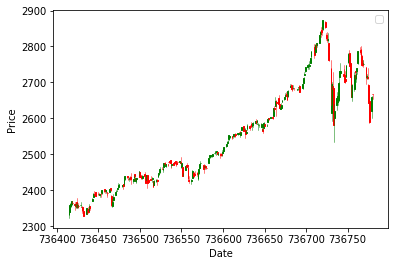

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as dates
import datetime as dt

df = pd.read_csv('SPX_ONEYEAR.csv')
print(df.head(5))
#df = df.reset_index()
df.head(5)
dfcolumns = ['Date','Open', 'High', 'Low', 'Close','Volume']
format_str = '%m/%d/%Y' # The format
df['Date'] = df['Date'].map(mdates.datestr2num)
print(df.head(5))
fig = plt.figure()
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=10, colspan=1)
plt.xlabel("Date")
candlestick_ohlc(ax1,df.values,width=1, colorup='g', colordown='r',alpha=1)
plt.ylabel("Price")
plt.legend('')

In [184]:
mdates.datestr2num('03/03/2017')
?mdates.datestr2num

In [203]:

def line_function(p1,p2,x):
    k = 1.0*(p1[1]-p2[1])/ (p1[0]-p2[0]) #slope
    return p1[1]+k*(x-p1[0])
p1 = (1, 2)
p2 = (2, 4)
print (line_function(p1,p2,3))

[item for item in all_small_extremes(list(df['Low'])[-30:]) if item [0] == True]

        
sorted(all_small_extremes(list(df['Low'])[-30:]), key =  lambda x: x[2])

6.0


[(True, 6, 2697.77002),
 (True, 12, 2647.320068),
 (True, 15, 2701.73999),
 (True, 21, 2741.469971),
 (True, 23, 2694.590088),
 (True, 27, 2585.889893)]

In [172]:
import datetime
date_str = '12/31/2017' # The date - 29 Dec 2017
format_str = '%m/%d/%Y' # The format
datetime_obj = datetime.datetime.strptime(date_str, format_str).strftime("%Y-%m-%d")
print (datetime_obj)

2017-12-31
